In [1]:
import ast
df = pd.read_csv("../../../models_storage/word_embeddings_data/ocr_text_with_tags_10000_jan21.csv")


NameError: name 'pd' is not defined

In [109]:
df.head()

,Unnamed: 0,filename,text,edited_filename,text_unpacked
0,0,journal-article-10.2307_2065002,"['research', 'note', 'church', 'membership', '...",10.2307_2065002,research note church membership netherlands ro...
1,1,journal-article-10.2307_3380821,"['polish', 'i3o', 'oo', 'sociological', 'revie...",10.2307_3380821,polish i3o oo sociological review issn communi...
2,2,journal-article-10.2307_2095822,"['article', 'jjdlbsj', 'grapliy', 'compassiona...",10.2307_2095822,article jjdlbsj grapliy compassionate egalitar...
3,3,journal-article-10.2307_2631839,"['reply', 'allison', 'more', 'comparing', 'reg...",10.2307_2631839,reply allison more comparing regression coeffi...
4,4,journal-article-10.2307_40836133,"['determinants', 'spousal', 'interaction', 'ma...",10.2307_40836133,determinants spousal interaction marital struc...


In [103]:
text_unpacked = [ast.literal_eval(t) for t in df.text]
text_unpacked_short = [t[:2000] for t in text_unpacked]

KeyboardInterrupt: 

In [ ]:
df.text_unpacked = [' '.join(t) for t in text_unpacked_short]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import NegativeBinomial
np.random.seed(42)

In [3]:
#df = pd.read_csv('../../../models_storage/word_embeddings_data/text_with_cosine_scores_wdg_jan11.csv')
df = pd.read_csv('../../../models_storage/word_embeddings_data/text_with_cosine_scores_wdg_aug16.csv')

In [4]:
df_label = pd.read_csv('../../../models_storage/word_embeddings_data/counts_and_subject.csv', low_memory=False)

In [5]:
list(df_label)

['article_id',
 'culture_ngram_count',
 'culture_ngram_count.1',
 'relational_ngram_count',
 'relational_ngram_count.1',
 'demographic_ngram_count',
 'demographic_ngram_count.1',
 'word_count',
 'cultural_author_count',
 'demographic_author_count',
 'relational_author_count',
 'primary_subject',
 'year']

In [6]:
df_label.article_id = df_label.article_id.apply(lambda x: x[16:])

In [7]:
df = pd.merge(df, df_label, how='left', left_on='edited_filename', right_on='article_id')

In [8]:
df = df[df.culture_ngram_count.isnull() == False]

In [9]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0_y'])

In [10]:
df.head()

,filename_x,edited_filename,culture,demographic,relational,filename_y,text,relational_doc2vec_cosine,demographic_doc2vec_cosine,culture_doc2vec_cosine,...,relational_ngram_count,relational_ngram_count.1,demographic_ngram_count,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,relational_author_count,primary_subject,year
0,../../../jstor_data/ocr/journal-article-10.230...,10.2307_1387034,0.609090,0.616106,0.450964,../../../jstor_data/ocr/journal-article-10.230...,research note church membership the netherland...,0.037736,0.074852,0.010707,...,1.0,0.0,1.0,1.0,1361.0,0.0,0.0,0.0,Sociology,1988
1,../../../jstor_data/ocr/journal-article-10.230...,10.2307_41274754,0.612232,0.618713,0.445802,../../../jstor_data/ocr/journal-article-10.230...,polish iooo sociological review graduate sch...,0.028283,0.021214,0.038979,...,5.0,2.0,1.0,1.0,1238.0,0.0,0.0,0.0,Sociology,2000
2,../../../jstor_data/ocr/journal-article-10.230...,10.2307_24467156,0.618802,0.627400,0.459231,../../../jstor_data/ocr/journal-article-10.230...,article ■jjdlbsj grapliy compassionate egalita...,0.021041,0.025699,0.053906,...,46.0,21.0,5.0,4.0,7959.0,0.0,0.0,0.0,Sociology,2014
3,../../../jstor_data/ocr/journal-article-10.230...,10.2307_2782279,0.605174,0.611529,0.443576,../../../jstor_data/ocr/journal-article-10.230...,allison regressiallison raises legitimate que...,0.019344,0.028638,0.029558,...,0.0,0.0,7.0,7.0,1979.0,0.0,0.0,0.0,Sociology,1995
6,../../../jstor_data/ocr/journal-article-10.230...,10.2307_351656,0.613089,0.618886,0.450866,../../../jstor_data/ocr/journal-article-10.230...,determinants spousal interaction marital struc...,0.002458,0.050677,0.023544,...,14.0,6.0,10.0,5.0,4340.0,0.0,0.0,0.0,Sociology,1983


In [11]:
# Convert ngram counts to proportions, keep for logit models
df['culture_ngram_prop'] = (df.culture_ngram_count)/(df.word_count)
df['demographic_ngram_prop'] = (df.demographic_ngram_count)/(df.word_count)
df['relational_ngram_prop'] = (df.relational_ngram_count)/(df.word_count)

In [12]:
# Take log of word count (length matters less as it gets larger)
df.word_count = np.log(df.word_count)

In [13]:
def discipline_to_numeric(x):
    if x=='Sociology':
        return 0
    if x=='Management & Organizational Behavior':
        return 1
df.primary_subject = df.primary_subject.apply(discipline_to_numeric)

In [14]:
df.year = df.year.apply(lambda x: int(x[:4]))

In [15]:
#df.year = df.year.apply(lambda x: int(x[:4]) - int(1970))
#df.year = (df.year - df.year.min())/(df.year.max() - df.year.min())

#### Dichotomous coding of foundational text citations

In [16]:
df['cultural_author_count'] = df['cultural_author_count'].apply(lambda x: 1 if x > 0 else 0)
df['demographic_author_count'] = df['demographic_author_count'].apply(lambda x: 1 if x > 0 else 0)
df['relational_author_count'] = df['relational_author_count'].apply(lambda x: 1 if x > 0 else 0)

In [17]:
df.head()

,filename_x,edited_filename,culture,demographic,relational,filename_y,text,relational_doc2vec_cosine,demographic_doc2vec_cosine,culture_doc2vec_cosine,...,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,relational_author_count,primary_subject,year,culture_ngram_prop,demographic_ngram_prop,relational_ngram_prop
0,../../../jstor_data/ocr/journal-article-10.230...,10.2307_1387034,0.609090,0.616106,0.450964,../../../jstor_data/ocr/journal-article-10.230...,research note church membership the netherland...,0.037736,0.074852,0.010707,...,1.0,7.215975,0,0,0,0,1988,0.000735,0.000735,0.000735
1,../../../jstor_data/ocr/journal-article-10.230...,10.2307_41274754,0.612232,0.618713,0.445802,../../../jstor_data/ocr/journal-article-10.230...,polish iooo sociological review graduate sch...,0.028283,0.021214,0.038979,...,1.0,7.121252,0,0,0,0,2000,0.000000,0.000808,0.004039
2,../../../jstor_data/ocr/journal-article-10.230...,10.2307_24467156,0.618802,0.627400,0.459231,../../../jstor_data/ocr/journal-article-10.230...,article ■jjdlbsj grapliy compassionate egalita...,0.021041,0.025699,0.053906,...,4.0,8.982059,0,0,0,0,2014,0.001131,0.000628,0.005780
3,../../../jstor_data/ocr/journal-article-10.230...,10.2307_2782279,0.605174,0.611529,0.443576,../../../jstor_data/ocr/journal-article-10.230...,allison regressiallison raises legitimate que...,0.019344,0.028638,0.029558,...,7.0,7.590347,0,0,0,0,1995,0.012633,0.003537,0.000000
6,../../../jstor_data/ocr/journal-article-10.230...,10.2307_351656,0.613089,0.618886,0.450866,../../../jstor_data/ocr/journal-article-10.230...,determinants spousal interaction marital struc...,0.002458,0.050677,0.023544,...,5.0,8.375630,0,0,0,0,1983,0.005991,0.002304,0.003226


In [18]:
df.word_count[df.word_count.isnull()]

Series([], Name: word_count, dtype: float64)

### Normalize measures

In [19]:
df['culture'] = (df.culture - df.culture.min())/(df.culture.max()-df.culture.min())
df['demographic'] = (df.demographic - df.demographic.min())/(df.demographic.max()-df.demographic.min())
df['relational'] = (df.relational - df.relational.min())/(df.relational.max()-df.relational.min())

df['culture_doc2vec_cosine'] = (df.culture_doc2vec_cosine - df.culture_doc2vec_cosine.min())/(df.culture_doc2vec_cosine.max()-df.culture_doc2vec_cosine.min())
df['demographic_doc2vec_cosine'] = (df.demographic_doc2vec_cosine - df.demographic_doc2vec_cosine.min())/(df.demographic_doc2vec_cosine.max()-df.demographic_doc2vec_cosine.min())
df['relational_doc2vec_cosine'] = (df.relational_doc2vec_cosine - df.relational_doc2vec_cosine.min())/(df.relational_doc2vec_cosine.max()-df.relational_doc2vec_cosine.min())

df['culture_word2vec_cosine'] = (df.culture_word2vec_cosine - df.culture_word2vec_cosine.min())/(df.culture_word2vec_cosine.max()-df.culture_word2vec_cosine.min())
df['demographic_word2vec_cosine'] = (df.demographic_word2vec_cosine - df.demographic_word2vec_cosine.min())/(df.demographic_word2vec_cosine.max()-df.demographic_word2vec_cosine.min())
df['relational_word2vec_cosine'] = (df.relational_word2vec_cosine - df.relational_word2vec_cosine.min())/(df.relational_word2vec_cosine.max()-df.relational_word2vec_cosine.min())

df['culture_glove_cosine'] = (df.culture_glove_cosine - df.culture_glove_cosine.min())/(df.culture_glove_cosine.max()-df.culture_glove_cosine.min())
df['demographic_glove_cosine'] = (df.demographic_glove_cosine - df.demographic_glove_cosine.min())/(df.demographic_glove_cosine.max()-df.demographic_glove_cosine.min())
df['relational_glove_cosine'] = (df.relational_glove_cosine - df.relational_glove_cosine.min())/(df.relational_glove_cosine.max()-df.relational_glove_cosine.min())

df['culture_ngram_count'] = (df.culture_ngram_count - df.culture_ngram_count.min())/(df.culture_ngram_count.max()-df.culture_ngram_count.min())
df['demographic_ngram_count'] = (df.demographic_ngram_count - df.demographic_ngram_count.min())/(df.demographic_ngram_count.max()-df.demographic_ngram_count.min())
df['relational_ngram_count'] = (df.relational_ngram_count - df.relational_ngram_count.min())/(df.relational_ngram_count.max()-df.relational_ngram_count.min())

df['culture_ngram_prop'] = (df.culture_ngram_prop - df.culture_ngram_prop.min())/(df.culture_ngram_prop.max()-df.culture_ngram_prop.min())
df['demographic_ngram_prop'] = (df.demographic_ngram_prop - df.demographic_ngram_prop.min())/(df.demographic_ngram_prop.max()-df.demographic_ngram_prop.min())
df['relational_ngram_prop'] = (df.relational_ngram_prop - df.relational_ngram_prop.min())/(df.relational_ngram_prop.max()-df.relational_ngram_prop.min())

### Show number of non-zeroes in DV

In [33]:
np.sum((df['demographic_author_count']) > 0.5)

1039

In [34]:
np.sum((df['relational_author_count']) > 0.5)

916

In [32]:
np.sum((df['cultural_author_count']) > 0.5)

1526

In [35]:
len(df)

69657

### Test/train split

In [20]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]

In [21]:
df.head()

,filename_x,edited_filename,culture,demographic,relational,filename_y,text,relational_doc2vec_cosine,demographic_doc2vec_cosine,culture_doc2vec_cosine,...,demographic_ngram_count.1,word_count,cultural_author_count,demographic_author_count,relational_author_count,primary_subject,year,culture_ngram_prop,demographic_ngram_prop,relational_ngram_prop
0,../../../jstor_data/ocr/journal-article-10.230...,10.2307_1387034,0.904367,0.904887,0.875815,../../../jstor_data/ocr/journal-article-10.230...,research note church membership the netherland...,0.148715,0.313257,0.037126,...,1.0,7.215975,0,0,0,0,1988,0.006796,0.009552,0.007073
1,../../../jstor_data/ocr/journal-article-10.230...,10.2307_41274754,0.911813,0.911070,0.864581,../../../jstor_data/ocr/journal-article-10.230...,polish iooo sociological review graduate sch...,0.111461,0.088769,0.135160,...,1.0,7.121252,0,0,0,0,2000,0.000000,0.010501,0.038879
2,../../../jstor_data/ocr/journal-article-10.230...,10.2307_24467156,0.927383,0.931674,0.893807,../../../jstor_data/ocr/journal-article-10.230...,article ■jjdlbsj grapliy compassionate egalita...,0.082921,0.107541,0.186922,...,4.0,8.982059,0,0,0,0,2014,0.010460,0.008167,0.055637
3,../../../jstor_data/ocr/journal-article-10.230...,10.2307_2782279,0.895088,0.894031,0.859735,../../../jstor_data/ocr/journal-article-10.230...,allison regressiallison raises legitimate que...,0.076234,0.119842,0.102492,...,7.0,7.590347,0,0,0,0,1995,0.116852,0.045983,0.000000
6,../../../jstor_data/ocr/journal-article-10.230...,10.2307_351656,0.913844,0.911480,0.875602,../../../jstor_data/ocr/journal-article-10.230...,determinants spousal interaction marital struc...,0.009682,0.212081,0.081638,...,5.0,8.375630,0,0,0,0,1983,0.055415,0.029954,0.031053


## IGNORE (not used) nbreg

In [22]:
'''
dict_methods = {
    'culture_infersent': [['cultural_author_count'],['culture', 'primary_subject']],
    'demographic_infersent': [['demographic_author_count'],['demographic', 'primary_subject']],
    'relational_infersent': [['relational_author_count'],['relational', 'primary_subject']],
    'culture_doc2vec': [['cultural_author_count'],['culture_doc2vec_cosine', 'primary_subject']],
    'demographic_doc2vec': [['demographic_author_count'],['demographic_doc2vec_cosine', 'primary_subject']],
    'relational_doc2vec': [['relational_author_count'],['relational_doc2vec_cosine', 'primary_subject']],
    'culture_word2vec': [['cultural_author_count'],['culture_word2vec_cosine', 'primary_subject']],
    'demographic_word2vec': [['demographic_author_count'],['demographic_word2vec_cosine', 'primary_subject']],
    'relational_word2vec': [['relational_author_count'],['relational_word2vec_cosine', 'primary_subject']],
    'culture_glove': [['cultural_author_count'],['culture_glove_cosine', 'primary_subject']],
    'demographic_glove': [['demographic_author_count'],['demographic_glove_cosine', 'primary_subject']],
    'relational_glove': [['relational_author_count'],['relational_glove_cosine', 'primary_subject']],    
    'culture_ngram': [['cultural_author_count'],['culture_ngram_count', 'primary_subject']],
    'demographic_ngram': [['demographic_author_count'],['demographic_ngram_count', 'primary_subject']],
    'relational_ngram': [['relational_author_count'],['relational_ngram_count', 'primary_subject']],    
}
'''

"\ndict_methods = {\n    'culture_infersent': [['cultural_author_count'],['culture', 'primary_subject']],\n    'demographic_infersent': [['demographic_author_count'],['demographic', 'primary_subject']],\n    'relational_infersent': [['relational_author_count'],['relational', 'primary_subject']],\n    'culture_doc2vec': [['cultural_author_count'],['culture_doc2vec_cosine', 'primary_subject']],\n    'demographic_doc2vec': [['demographic_author_count'],['demographic_doc2vec_cosine', 'primary_subject']],\n    'relational_doc2vec': [['relational_author_count'],['relational_doc2vec_cosine', 'primary_subject']],\n    'culture_word2vec': [['cultural_author_count'],['culture_word2vec_cosine', 'primary_subject']],\n    'demographic_word2vec': [['demographic_author_count'],['demographic_word2vec_cosine', 'primary_subject']],\n    'relational_word2vec': [['relational_author_count'],['relational_word2vec_cosine', 'primary_subject']],\n    'culture_glove': [['cultural_author_count'],['culture_glove_

In [23]:
'''
for key in dict_methods.keys():
    poisson_training_results = sm.GLM(df_train[dict_methods[key][0]], df_train[dict_methods[key][1]], 
                                  family=sm.families.Poisson()).fit()
    BB_LAMBDA = poisson_training_results.mu
    AUX_OLS_DEP = ((df_train[dict_methods[key][0]] - BB_LAMBDA)**2 
                                                        - df_train[dict_methods[key][0]]) / BB_LAMBDA
    ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
    d = {'AUX_OLS_DEP': AUX_OLS_DEP, 'BB_LAMBDA': BB_LAMBDA}
    df_new = pd.DataFrame(data=d)
    aux_olsr_results = smf.ols(ols_expr, df_new).fit()
    nb2_training_results = sm.GLM(df_train[dict_methods[key][0]], df_train[dict_methods[key][1]], 
                              offset=df_train['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
    print(key)
    print(nb2_training_results.summary())
    print()
    '''

'\nfor key in dict_methods.keys():\n    poisson_training_results = sm.GLM(df_train[dict_methods[key][0]], df_train[dict_methods[key][1]], \n                                  family=sm.families.Poisson()).fit()\n    BB_LAMBDA = poisson_training_results.mu\n    AUX_OLS_DEP = ((df_train[dict_methods[key][0]] - BB_LAMBDA)**2 \n                                                        - df_train[dict_methods[key][0]]) / BB_LAMBDA\n    ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""\n    d = {\'AUX_OLS_DEP\': AUX_OLS_DEP, \'BB_LAMBDA\': BB_LAMBDA}\n    df_new = pd.DataFrame(data=d)\n    aux_olsr_results = smf.ols(ols_expr, df_new).fit()\n    nb2_training_results = sm.GLM(df_train[dict_methods[key][0]], df_train[dict_methods[key][1]], \n                              offset=df_train[\'word_count\'],\n                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()\n    print(key)\n    print(nb2_training_results.summary())\n    print()\n    '

# Logistic Reg
## Infersent - Culture

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(df_train[['culture']], df_train['cultural_author_count'])

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = logreg.predict(df_test[['culture']])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(df_test[['culture']]
                                                                                           , df_test['cultural_author_count'])))

Accuracy of logistic regression classifier on test set: 0.98


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df_test['cultural_author_count'], y_pred)
print(confusion_matrix)

[[13562     0]
 [  310     0]]


In [27]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['cultural_author_count'], df[['culture', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.101535
         Iterations 8
                            Results: Logit
Model:              Logit                 Pseudo R-squared: 0.036      
Dependent Variable: cultural_author_count AIC:              14151.2581 
Date:               2020-01-29 12:54      BIC:              14178.7121 
No. Observations:   69657                 Log-Likelihood:   -7072.6    
Df Model:           2                     LL-Null:          -7339.9    
Df Residuals:       69654                 LLR p-value:      8.3818e-117
Converged:          1.0000                Scale:            1.0000     
No. Iterations:     8.0000                                             
------------------------------------------------------------------------
                    Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------------
culture            -5.7096    0.5577  -10.2371  0.0000  -6.8

In [28]:
np.sum(result.predict(df_train[['culture_glove_cosine', 'primary_subject', 'year']]) > 0.5)

66

In [29]:
np.sum((df_train['cultural_author_count']) > 0.5)

1216

## Infersent - Demographic

In [30]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['demographic_author_count'],df[['demographic', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.072251
         Iterations 9
                              Results: Logit
Model:              Logit                    Pseudo R-squared: 0.068      
Dependent Variable: demographic_author_count AIC:              10071.5756 
Date:               2020-01-29 12:54         BIC:              10099.0296 
No. Observations:   69657                    Log-Likelihood:   -5032.8    
Df Model:           2                        LL-Null:          -5400.5    
Df Residuals:       69654                    LLR p-value:      1.9288e-160
Converged:          1.0000                   Scale:            1.0000     
No. Iterations:     9.0000                                                
----------------------------------------------------------------------------
                    Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
----------------------------------------------------------------------------
demographic        -4.

## Infersent - relational

In [126]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['relational_author_count'],df[['relational', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.062012
         Iterations 10
                             Results: Logit
Model:              Logit                   Pseudo R-squared: 0.114      
Dependent Variable: relational_author_count AIC:              8645.0881  
Date:               2020-01-28 23:05        BIC:              8672.5421  
No. Observations:   69657                   Log-Likelihood:   -4319.5    
Df Model:           2                       LL-Null:          -4877.4    
Df Residuals:       69654                   LLR p-value:      5.1066e-243
Converged:          1.0000                  Scale:            1.0000     
No. Iterations:     10.0000                                              
--------------------------------------------------------------------------
                   Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
--------------------------------------------------------------------------
relational        -12.1845    0.2032

## Doc2vec - culture

In [127]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['cultural_author_count'],df[['culture_doc2vec_cosine', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.157398
         Iterations 9
                              Results: Logit
Model:                Logit                  Pseudo R-squared:  -0.494    
Dependent Variable:   cultural_author_count  AIC:               21933.7478
Date:                 2020-01-28 23:05       BIC:               21961.2018
No. Observations:     69657                  Log-Likelihood:    -10964.   
Df Model:             2                      LL-Null:           -7339.9   
Df Residuals:         69654                  LLR p-value:       1.0000    
Converged:            1.0000                 Scale:             1.0000    
No. Iterations:       9.0000                                              
--------------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
culture_doc2vec_cosine -46.0

## Doc2vec - demographic

In [128]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['demographic_author_count'],df[['demographic_doc2vec_cosine', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.118219
         Iterations 9
                                Results: Logit
Model:                 Logit                     Pseudo R-squared:  -0.525    
Dependent Variable:    demographic_author_count  AIC:               16475.4992
Date:                  2020-01-28 23:05          BIC:               16502.9532
No. Observations:      69657                     Log-Likelihood:    -8234.7   
Df Model:              2                         LL-Null:           -5400.5   
Df Residuals:          69654                     LLR p-value:       1.0000    
Converged:             1.0000                    Scale:             1.0000    
No. Iterations:        9.0000                                                 
------------------------------------------------------------------------------
                            Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-------------------------------------------------------------

## Doc2vec - relational

In [129]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['relational_author_count'],df[['relational_doc2vec_cosine', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.107254
         Iterations 9
                               Results: Logit
Model:                 Logit                    Pseudo R-squared:  -0.532    
Dependent Variable:    relational_author_count  AIC:               14947.9429
Date:                  2020-01-28 23:05         BIC:               14975.3970
No. Observations:      69657                    Log-Likelihood:    -7471.0   
Df Model:              2                        LL-Null:           -4877.4   
Df Residuals:          69654                    LLR p-value:       1.0000    
Converged:             1.0000                   Scale:             1.0000    
No. Iterations:        9.0000                                                
-----------------------------------------------------------------------------
                           Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------

## Word2vec - culture

In [130]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['cultural_author_count'],df[['culture_word2vec_cosine', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.118564
         Iterations 8
                             Results: Logit
Model:                Logit                 Pseudo R-squared: -0.125    
Dependent Variable:   cultural_author_count AIC:              16523.6430
Date:                 2020-01-28 23:05      BIC:              16551.0970
No. Observations:     69657                 Log-Likelihood:   -8258.8   
Df Model:             2                     LL-Null:          -7339.9   
Df Residuals:         69654                 LLR p-value:      1.0000    
Converged:            1.0000                Scale:            1.0000    
No. Iterations:       8.0000                                            
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
culture_word2vec_cosine -6.5502   0.0887 -73.8207 0

## Word2vec - demographic

In [131]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['demographic_author_count'],df[['demographic_word2vec_cosine', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.084184
         Iterations 9
                               Results: Logit
Model:               Logit                     Pseudo R-squared:  -0.086    
Dependent Variable:  demographic_author_count  AIC:               11733.9408
Date:                2020-01-28 23:06          BIC:               11761.3948
No. Observations:    69657                     Log-Likelihood:    -5864.0   
Df Model:            2                         LL-Null:           -5400.5   
Df Residuals:        69654                     LLR p-value:       1.0000    
Converged:           1.0000                    Scale:             1.0000    
No. Iterations:      9.0000                                                 
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
demog

## Word2vec - relational

In [132]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['relational_author_count'],df[['relational_word2vec_cosine', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.073016
         Iterations 9
                              Results: Logit
Model:               Logit                    Pseudo R-squared:  -0.043    
Dependent Variable:  relational_author_count  AIC:               10178.2036
Date:                2020-01-28 23:06         BIC:               10205.6577
No. Observations:    69657                    Log-Likelihood:    -5086.1   
Df Model:            2                        LL-Null:           -4877.4   
Df Residuals:        69654                    LLR p-value:       1.0000    
Converged:           1.0000                   Scale:             1.0000    
No. Iterations:      9.0000                                                
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
relational_word2v

## Glove - culture

In [133]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['cultural_author_count'],df[['culture_glove_cosine', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.114411
         Iterations 8
                            Results: Logit
Model:              Logit                 Pseudo R-squared: -0.086    
Dependent Variable: cultural_author_count AIC:              15945.0233
Date:               2020-01-28 23:06      BIC:              15972.4773
No. Observations:   69657                 Log-Likelihood:   -7969.5   
Df Model:           2                     LL-Null:          -7339.9   
Df Residuals:       69654                 LLR p-value:      1.0000    
Converged:          1.0000                Scale:            1.0000    
No. Iterations:     8.0000                                            
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
culture_glove_cosine  -7.2710   0.0969 -75.0742 0.0000 -7.4608 -7.0811
pri

## Glove - demographic

In [134]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['demographic_author_count'],df[['demographic_glove_cosine', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.080611
         Iterations 9
                             Results: Logit
Model:              Logit                    Pseudo R-squared: -0.040    
Dependent Variable: demographic_author_count AIC:              11236.1835
Date:               2020-01-28 23:06         BIC:              11263.6375
No. Observations:   69657                    Log-Likelihood:   -5615.1   
Df Model:           2                        LL-Null:          -5400.5   
Df Residuals:       69654                    LLR p-value:      1.0000    
Converged:          1.0000                   Scale:            1.0000    
No. Iterations:     9.0000                                               
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
demographic_glove_cosine -6.5861   0.097

## Glove - relational

In [135]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['relational_author_count'],df[['relational_glove_cosine', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.069880
         Iterations 9
                             Results: Logit
Model:              Logit                   Pseudo R-squared: 0.002     
Dependent Variable: relational_author_count AIC:              9741.2114 
Date:               2020-01-28 23:06        BIC:              9768.6654 
No. Observations:   69657                   Log-Likelihood:   -4867.6   
Df Model:           2                       LL-Null:          -4877.4   
Df Residuals:       69654                   LLR p-value:      5.3490e-05
Converged:          1.0000                  Scale:            1.0000    
No. Iterations:     9.0000                                              
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
relational_glove_cosine -6.4927   0.1012 -64.1318 0

## ngram - culture

In [136]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['cultural_author_count'],df[['culture_ngram_count', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.202555
         Iterations 9
                            Results: Logit
Model:              Logit                 Pseudo R-squared: -0.922    
Dependent Variable: cultural_author_count AIC:              28224.6936
Date:               2020-01-28 23:06      BIC:              28252.1477
No. Observations:   69657                 Log-Likelihood:   -14109.   
Df Model:           2                     LL-Null:          -7339.9   
Df Residuals:       69654                 LLR p-value:      1.0000    
Converged:          1.0000                Scale:            1.0000    
No. Iterations:     9.0000                                            
----------------------------------------------------------------------
                      Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
culture_ngram_count   0.0071   0.0004   17.2018 0.0000  0.0063  0.0079
pri

## ngram - demographic

In [137]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['demographic_author_count'],df[['demographic_ngram_count', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.155104
         Iterations 9
                             Results: Logit
Model:              Logit                    Pseudo R-squared: -1.001    
Dependent Variable: demographic_author_count AIC:              21614.1569
Date:               2020-01-28 23:06         BIC:              21641.6109
No. Observations:   69657                    Log-Likelihood:   -10804.   
Df Model:           2                        LL-Null:          -5400.5   
Df Residuals:       69654                    LLR p-value:      1.0000    
Converged:          1.0000                   Scale:            1.0000    
No. Iterations:     9.0000                                               
-------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
-------------------------------------------------------------------------
demographic_ngram_count  0.0116   0.0005

## ngram - relational

In [138]:
from sklearn.linear_model import LogisticRegression
logit_model=sm.Logit(df['relational_author_count'],df[['relational_ngram_count', 'primary_subject', 'year']])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.147090
         Iterations 9
                             Results: Logit
Model:               Logit                   Pseudo R-squared: -1.101    
Dependent Variable:  relational_author_count AIC:              20497.7053
Date:                2020-01-28 23:06        BIC:              20525.1594
No. Observations:    69657                   Log-Likelihood:   -10246.   
Df Model:            2                       LL-Null:          -4877.4   
Df Residuals:        69654                   LLR p-value:      1.0000    
Converged:           1.0000                  Scale:            1.0000    
No. Iterations:      9.0000                                              
-------------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-------------------------------------------------------------------------
relational_ngram_count   0.0016   0.0003

## Visualization

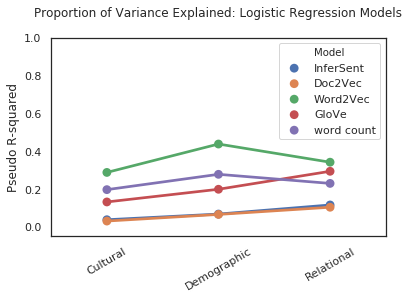

In [40]:
#change this if you have more dictionary sizes
ls_lens = [5, 10, 100, 5, 10, 100, 5, 10, 100, 5, 10, 100, 5, 10, 100]
ls_avgs = [0.038, 0.068, 0.116, 
           0.031, 0.066, 0.104,
           0.288, 0.438, 0.342,
           0.132, 0.199, 0.294,
           0.197, 0.278, 0.23
          ] #Put three same things because we only have one dictionary size rn
                                               #change later when dictionary sizes are provided and created
d = {'Strength': ls_avgs, 'Words':ls_lens, 'Model':['InferSent', 'InferSent', 'InferSent',
                                                    'Doc2Vec','Doc2Vec','Doc2Vec', 
                                                    'Word2Vec', 'Word2Vec', 'Word2Vec',
                                                    'GloVe', 'GloVe', 'GloVe',
                                                    'word count', 'word count', 'word count'
                                                     ]}
dat = pd.DataFrame(data=d)
x1 = list(range(3)) #change this if you have more dictionary sizes
squad = ['Cultural','Demographic','Relational'] #arbitrary values for demonstration purpose only atm.

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.set_style("white")
ax = sns.pointplot(x="Words", y="Strength", data=dat, hue='Model')
ax.set_xticks(x1)
ax.set_xticklabels(squad, minor=False, rotation=30)
ax.set_ylim(-0.05,1)
ax.set(xlabel='', ylabel='Pseudo R-squared')
plt.title("Proportion of Variance Explained: Logistic Regression Models\n")
#plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.19)
plt.savefig('logistic_reg_binary_012620.png', dpi=300)
plt.show()

# nbreg

In [86]:
#df = pd.read_csv('../../../models_storage/word_embeddings_data/text_with_cosine_scores_wdg_jan11.csv')
df = pd.read_csv('../../../models_storage/word_embeddings_data/text_with_cosine_scores_wdg_aug16.csv')
df_label = pd.read_csv('../../../models_storage/word_embeddings_data/counts_and_subject.csv', low_memory=False)
df_label.article_id = df_label.article_id.apply(lambda x: x[16:])
df = pd.merge(df, df_label, how='left', left_on='edited_filename', right_on='article_id')
df = df[df.culture_ngram_count.isnull() == False]
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0_y'])
df.word_count = np.log(df.word_count)
def discipline_to_numeric(x):
    if x=='Sociology':
        return 0
    if x=='Management & Organizational Behavior':
        return 1
df.primary_subject = df.primary_subject.apply(discipline_to_numeric)
df.year = df.year.apply(lambda x: int(x[:4]))

## infersent 
### Culture

In [87]:
poisson_training_results = sm.GLM(df['cultural_author_count'], df[['culture', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()

In [88]:
df['BB_LAMBDA'] = poisson_training_results.mu

In [89]:
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['cultural_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['cultural_author_count']) / x['BB_LAMBDA'], axis=1)

In [90]:
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""

In [91]:
aux_olsr_results = smf.ols(ols_expr, df).fit()

In [92]:
print(aux_olsr_results.params)

BB_LAMBDA    58.737906
dtype: float64


In [93]:
aux_olsr_results.tvalues #98% confidence

BB_LAMBDA    7.487131
dtype: float64

In [94]:
nb2_training_results = sm.GLM(df['cultural_author_count'], df[['culture', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [95]:
print(nb2_training_results.summary())


                   Generalized Linear Model Regression Results                   
Dep. Variable:     cultural_author_count   No. Observations:                69657
Model:                               GLM   Df Residuals:                    69655
Model Family:           NegativeBinomial   Df Model:                            1
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -9499.9
Date:                   Tue, 28 Jan 2020   Deviance:                       4179.5
Time:                           19:42:08   Pearson chi2:                 7.70e+04
No. Iterations:                       10   Covariance Type:             nonrobust
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
culture           -19.8574      0.072   -273.943      0.000     -19.999     -19.715
primary_su

### Demographic

In [96]:
poisson_training_results = sm.GLM(df['demographic_author_count'], df[['demographic', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['demographic_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['demographic_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['demographic_author_count'], df[['demographic', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                    Generalized Linear Model Regression Results                     
Dep. Variable:     demographic_author_count   No. Observations:                69657
Model:                                  GLM   Df Residuals:                    69655
Model Family:              NegativeBinomial   Df Model:                            1
Link Function:                          log   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -6762.8
Date:                      Tue, 28 Jan 2020   Deviance:                       2487.3
Time:                              19:42:31   Pearson chi2:                 1.49e+05
No. Iterations:                          11   Covariance Type:             nonrobust
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
demographic       -20.5080      0.095   -215.054      0.000     -20

### Relational

In [97]:
poisson_training_results = sm.GLM(df['relational_author_count'], df[['relational', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['relational_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['relational_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['relational_author_count'], df[['relational', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                    Generalized Linear Model Regression Results                    
Dep. Variable:     relational_author_count   No. Observations:                69657
Model:                                 GLM   Df Residuals:                    69655
Model Family:             NegativeBinomial   Df Model:                            1
Link Function:                         log   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -5429.1
Date:                     Tue, 28 Jan 2020   Deviance:                       2471.5
Time:                             19:42:38   Pearson chi2:                 7.08e+04
No. Iterations:                         12   Covariance Type:             nonrobust
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
relational        -30.6119      0.151   -203.011      0.000     -30.907     

## Word2vec
### Culture

In [98]:
poisson_training_results = sm.GLM(df['cultural_author_count'], df[['culture_word2vec_cosine', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['cultural_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['cultural_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['cultural_author_count'], df[['culture_word2vec_cosine', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                   Generalized Linear Model Regression Results                   
Dep. Variable:     cultural_author_count   No. Observations:                69657
Model:                               GLM   Df Residuals:                    69655
Model Family:           NegativeBinomial   Df Model:                            1
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -12193.
Date:                   Tue, 28 Jan 2020   Deviance:                       10555.
Time:                           19:42:47   Pearson chi2:                 4.22e+05
No. Iterations:                       19   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
culture_word2vec_cosine   -16.8302      0.052   -324.922      0.000     -16.93

### Demographic

In [99]:
poisson_training_results = sm.GLM(df['demographic_author_count'], df[['demographic_word2vec_cosine', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['demographic_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['demographic_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['demographic_author_count'], df[['demographic_word2vec_cosine', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                    Generalized Linear Model Regression Results                     
Dep. Variable:     demographic_author_count   No. Observations:                69657
Model:                                  GLM   Df Residuals:                    69655
Model Family:              NegativeBinomial   Df Model:                            1
Link Function:                          log   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -8273.3
Date:                      Tue, 28 Jan 2020   Deviance:                       6075.9
Time:                              19:43:12   Pearson chi2:                 5.62e+05
No. Iterations:                          22   Covariance Type:             nonrobust
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
demographic_word2vec_cosine   -17.0011     

### Relational

In [100]:
poisson_training_results = sm.GLM(df['relational_author_count'], df[['relational_word2vec_cosine', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['relational_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['relational_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['relational_author_count'], df[['relational_word2vec_cosine', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                    Generalized Linear Model Regression Results                    
Dep. Variable:     relational_author_count   No. Observations:                69657
Model:                                 GLM   Df Residuals:                    69655
Model Family:             NegativeBinomial   Df Model:                            1
Link Function:                         log   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -7010.7
Date:                     Tue, 28 Jan 2020   Deviance:                       6128.9
Time:                             19:43:19   Pearson chi2:                 8.78e+05
No. Iterations:                         21   Covariance Type:             nonrobust
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
relational_word2vec_cosine   -19.2595      0.071   -27

## Doc2vec
### Culture

In [101]:
poisson_training_results = sm.GLM(df['cultural_author_count'], df[['culture_doc2vec_cosine', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['cultural_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['cultural_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['cultural_author_count'], df[['culture_doc2vec_cosine', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                   Generalized Linear Model Regression Results                   
Dep. Variable:     cultural_author_count   No. Observations:                69657
Model:                               GLM   Df Residuals:                    69655
Model Family:           NegativeBinomial   Df Model:                            1
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -61915.
Date:                   Tue, 28 Jan 2020   Deviance:                   1.1565e+05
Time:                           19:43:23   Pearson chi2:                 3.89e+17
No. Iterations:                       53   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
culture_doc2vec_cosine  -232.1308      0.494   -470.293      0.000    -233.098  

### Demographic

In [102]:
poisson_training_results = sm.GLM(df['demographic_author_count'], df[['demographic_doc2vec_cosine', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['demographic_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['demographic_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['demographic_author_count'], df[['demographic_doc2vec_cosine', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                    Generalized Linear Model Regression Results                     
Dep. Variable:     demographic_author_count   No. Observations:                69657
Model:                                  GLM   Df Residuals:                    69655
Model Family:              NegativeBinomial   Df Model:                            1
Link Function:                          log   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -51172.
Date:                      Tue, 28 Jan 2020   Deviance:                       96808.
Time:                              19:43:27   Pearson chi2:                 2.43e+17
No. Iterations:                          59   Covariance Type:             nonrobust
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
demographic_doc2vec_cosine  -265.6306      0.

### Relational

In [103]:
poisson_training_results = sm.GLM(df['relational_author_count'], df[['relational_doc2vec_cosine', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['relational_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['relational_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['relational_author_count'], df[['relational_doc2vec_cosine', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                    Generalized Linear Model Regression Results                    
Dep. Variable:     relational_author_count   No. Observations:                69657
Model:                                 GLM   Df Residuals:                    69655
Model Family:             NegativeBinomial   Df Model:                            1
Link Function:                         log   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -58562.
Date:                     Tue, 28 Jan 2020   Deviance:                   1.1310e+05
Time:                             19:43:32   Pearson chi2:                 2.24e+18
No. Iterations:                         59   Covariance Type:             nonrobust
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
relational_doc2vec_cosine  -392.4016      0.876   -448.0

## GloVe
### Culture

In [104]:
poisson_training_results = sm.GLM(df['cultural_author_count'], df[['culture_glove_cosine', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['cultural_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['cultural_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['cultural_author_count'], df[['culture_glove_cosine', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                   Generalized Linear Model Regression Results                   
Dep. Variable:     cultural_author_count   No. Observations:                69657
Model:                               GLM   Df Residuals:                    69655
Model Family:           NegativeBinomial   Df Model:                            1
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -11353.
Date:                   Tue, 28 Jan 2020   Deviance:                       8910.1
Time:                           19:43:35   Pearson chi2:                 3.50e+05
No. Iterations:                       17   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
culture_glove_cosine   -19.2453      0.059   -324.489      0.000     -19.362     -19

### Demographic

In [105]:
poisson_training_results = sm.GLM(df['demographic_author_count'], df[['demographic_glove_cosine', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['demographic_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['demographic_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['demographic_author_count'], df[['demographic_glove_cosine', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                    Generalized Linear Model Regression Results                     
Dep. Variable:     demographic_author_count   No. Observations:                69657
Model:                                  GLM   Df Residuals:                    69655
Model Family:              NegativeBinomial   Df Model:                            1
Link Function:                          log   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:                -7601.3
Date:                      Tue, 28 Jan 2020   Deviance:                       4989.2
Time:                              19:43:39   Pearson chi2:                 3.49e+05
No. Iterations:                          17   Covariance Type:             nonrobust
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
demographic_glove_cosine   -17.3507      0.066   

### Relational

In [106]:
poisson_training_results = sm.GLM(df['relational_author_count'], df[['relational_glove_cosine', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['relational_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['relational_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['relational_author_count'], df[['relational_glove_cosine', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                    Generalized Linear Model Regression Results                    
Dep. Variable:     relational_author_count   No. Observations:                69657
Model:                                 GLM   Df Residuals:                    69655
Model Family:             NegativeBinomial   Df Model:                            1
Link Function:                         log   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -6469.4
Date:                     Tue, 28 Jan 2020   Deviance:                       5528.4
Time:                             19:43:42   Pearson chi2:                 3.25e+05
No. Iterations:                         16   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
relational_glove_cosine   -17.9699      0.068   -263.439    

## ngram
### culture

In [107]:
poisson_training_results = sm.GLM(df['cultural_author_count'], df[['culture_ngram_count', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['cultural_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['cultural_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['cultural_author_count'], df[['culture_ngram_count', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                   Generalized Linear Model Regression Results                   
Dep. Variable:     cultural_author_count   No. Observations:                69657
Model:                               GLM   Df Residuals:                    69655
Model Family:           NegativeBinomial   Df Model:                            1
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:            -2.5890e+05
Date:                   Tue, 28 Jan 2020   Deviance:                   5.1119e+05
Time:                           19:48:13   Pearson chi2:                 9.81e+18
No. Iterations:                       83   Covariance Type:             nonrobust
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
culture_ngram_count    -0.1111      0.000   -480.132      0.000      -0.112      -0.11

### Demographic

In [108]:
poisson_training_results = sm.GLM(df['demographic_author_count'], df[['demographic_ngram_count', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['demographic_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['demographic_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['demographic_author_count'], df[['demographic_ngram_count', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                    Generalized Linear Model Regression Results                     
Dep. Variable:     demographic_author_count   No. Observations:                69657
Model:                                  GLM   Df Residuals:                    69655
Model Family:              NegativeBinomial   Df Model:                            1
Link Function:                          log   Scale:                          1.0000
Method:                                IRLS   Log-Likelihood:            -2.8046e+05
Date:                      Tue, 28 Jan 2020   Deviance:                   5.5666e+05
Time:                              19:48:18   Pearson chi2:                 2.48e+19
No. Iterations:                         100   Covariance Type:             nonrobust
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
demographic_ngram_count    -0.1017      0.000   -40

### Relational

In [109]:
poisson_training_results = sm.GLM(df['relational_author_count'], df[['relational_ngram_count', 'primary_subject']], 
                                  family=sm.families.Poisson()).fit()
df['BB_LAMBDA'] = poisson_training_results.mu
df['AUX_OLS_DEP'] = df.apply(lambda x: ((x['relational_author_count'] - 
                                                     x['BB_LAMBDA'])**2 - x['relational_author_count']) / x['BB_LAMBDA'], axis=1)
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""
aux_olsr_results = smf.ols(ols_expr, df).fit()
nb2_training_results = sm.GLM(df['relational_author_count'], df[['relational_ngram_count', 'primary_subject']], 
                              offset=df['word_count'],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()
print(nb2_training_results.summary())


                    Generalized Linear Model Regression Results                    
Dep. Variable:     relational_author_count   No. Observations:                69657
Model:                                 GLM   Df Residuals:                    69655
Model Family:             NegativeBinomial   Df Model:                            1
Link Function:                         log   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:            -1.9552e+05
Date:                     Tue, 28 Jan 2020   Deviance:                   3.8754e+05
Time:                             19:48:24   Pearson chi2:                 3.01e+19
No. Iterations:                         68   Covariance Type:             nonrobust
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
relational_ngram_count    -0.2025      0.000   -750.829      0

# End

In [110]:
nb2_training_results.get_prediction(df_train[['culture', 'primary_subject']]).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,0.832684,0.000203,0.832286,0.833082
1,0.831429,0.000204,0.831029,0.831830
3,0.834250,0.000201,0.833855,0.834644
6,0.831088,0.000205,0.830686,0.831489
10,0.005793,0.000151,0.005503,0.006097
11,0.830027,0.000206,0.829623,0.830431
12,0.835386,0.000200,0.834994,0.835778
14,0.828172,0.000208,0.827765,0.828580
16,0.824855,0.000212,0.824441,0.825270
17,0.005871,0.000153,0.005578,0.006180


In [111]:
model_results

NameError: name 'model_results' is not defined

In [80]:
# expr = """culture_ngram_count.1 ~ culture"""

In [81]:
poisson_training_results = sm.GLM(df['culture_ngram_count.1'], df[['culture']], 
                                  family=sm.families.Poisson()).fit()

ValueError: The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.

In [ ]:
df['BB_LAMBDA'] = poisson_training_results.mu

In [ ]:
df['AUX_OLS_DEP'] = df_train.apply(lambda x: 
                                         ((x['CITATION_COUNT'] - x['BB_LAMBDA'])**2 - 
                                          x['CITATION_COUNT']) / x['BB_LAMBDA'], axis=1)

In [ ]:
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""

In [ ]:
aux_olsr_results = smf.ols(ols_expr, df).fit()

In [ ]:
print(aux_olsr_results.params)
print(aux_olsr_results.tvalues)

In [ ]:
nb2_training_results = sm.GLM(df['CITATION_COUNT'], df[['COSINE_1', 'COSINE_2', 'COSINE_3']],
                              family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [ ]:
nb2_training_results.mean